Đọc các file Excel trong bộ dữ liệu

In [80]:
import pandas as pd
import os
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [81]:
folder_path = "Data"
print(f"Đang đọc các file Excel trong thư mục: {folder_path}\n")

Đang đọc các file Excel trong thư mục: Data



Loại bỏ các giá trị Null trong các tập dữ liệu

In [82]:
# Đọc file và kiểm tra dữ liệu
for file_name in os.listdir(folder_path):
    if file_name.endswith(('.xlsx', '.xls')):
        file_path = os.path.join(folder_path, file_name)
        
        try:
            # Đọc file Excel
            data = pd.read_excel(file_path)
            
            # Lấy số hàng và số cột
            num_rows = data.shape[0]
            
            print(f"File: {file_name}")
            print(f"Kích thước: {num_rows} hàng")

            # Null checking
            null_counts = data.isnull().sum()
            
            # Hiển thị các cột có giá trị null
            if null_counts.sum() > 0:
                print("Số giá trị null theo cột:")
                print(null_counts[null_counts > 0])  # Chỉ hiển thị cột có null
                print(f"\nTổng số giá trị null: {null_counts.sum()}")
            else:
                print("Không có giá trị null nào trong file này")
            
            print("-" * 50)

        except Exception as e:
            print(f"Lỗi khi đọc file {file_name}: {e}")

File: SHGC-0.1_Tvis-0.9_Uval-0.05_modified.xlsx
Kích thước: 779 hàng
Không có giá trị null nào trong file này
--------------------------------------------------
File: SHGC-0.1_Tvis-0.9_Uval-1.00_modified.xlsx
Kích thước: 776 hàng
Không có giá trị null nào trong file này
--------------------------------------------------
File: SHGC-0.1_Tvis-0.9_Uval-2.00_modified.xlsx
Kích thước: 776 hàng
Không có giá trị null nào trong file này
--------------------------------------------------
File: SHGC-0.1_Tvis-0.9_Uval-3.00_modified.xlsx
Kích thước: 776 hàng
Không có giá trị null nào trong file này
--------------------------------------------------
File: SHGC-0.3_Tvis-0.9_Uval-0.05_modified.xlsx
Kích thước: 776 hàng
Không có giá trị null nào trong file này
--------------------------------------------------
File: SHGC-0.3_Tvis-0.9_Uval-1.00_modified.xlsx
Kích thước: 776 hàng
Không có giá trị null nào trong file này
--------------------------------------------------
File: SHGC-0.3_Tvis-0.9_Uval-2.00_

Gộp tất cả các file lại vào một DataFrame

In [83]:
# Tạo DataFrame cho train và test
df = pd.DataFrame()

for file_name in os.listdir(folder_path):
    if file_name.endswith(('.xlsx', '.xls')):
        file_path = os.path.join(folder_path, file_name)
        
        try:
            # Đọc file Excel
            data = pd.read_excel(file_path)

            
            # Cộng dồn vào biến tổng
            df = pd.concat([df, data], ignore_index=True)
            
            print(f"Đã xử lý: {file_name} ({len(data)} dòng)")
            
        except Exception as e:
            print(f"Lỗi khi xử lý {file_name}: {str(e)}")

# Kết quả cuối cùng
print("\nKết quả tổng hợp:")
print(f"Tổng df: {len(df)} dòng")

Đã xử lý: SHGC-0.1_Tvis-0.9_Uval-0.05_modified.xlsx (779 dòng)
Đã xử lý: SHGC-0.1_Tvis-0.9_Uval-1.00_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.1_Tvis-0.9_Uval-2.00_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.1_Tvis-0.9_Uval-3.00_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.3_Tvis-0.9_Uval-0.05_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.3_Tvis-0.9_Uval-1.00_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.3_Tvis-0.9_Uval-2.00_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.3_Tvis-0.9_Uval-3.00_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.3_Tvis-0.9_Uval-4.00_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.3_Tvis-0.9_Uval-5.00_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.3_Tvis-0.9_Uval-6.00_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.5_Tvis-0.9_Uval-0.05_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.7_Tvis-0.9_Uval-0.05_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.9_Tvis-0.9_Uval-0.05_modified.xlsx (775 dòng)

Kết quả tổng hợp:
Tổng df: 10866 dòng


In [84]:
df

,in:SHGC,in:U-val,out:P1_l,out:P1_r,out:P1_x,out:P1_y,out:P2_l,out:P2_r,out:P2_x,out:P2_y,...,out:S3_d1,out:S3_d2,out:S3_d3,out:S3_d4,out:S3_xi,out:S3_yi,out:Total-CoolingLoad (J),out:Total_HEAT-LOSS(J),in:T-Vis,in:SHCG
0,0.1,0.05,20.000000,0.5 * Pi,40.000000,10.000000,20.0,0.5 * Pi,60.000000,10.000000,...,14.142136,14.142136,14.142136,14.142136,50.000000,0.000000,1882600000000,125510000000,NaN,NaN
1,0.1,0.05,22.679492,0.5 * Pi,37.320508,20.000000,20.0,0.5 * Pi,57.320508,20.000000,...,14.142136,14.142136,14.142136,14.142136,47.320508,10.000000,1848600000000,128940000000,NaN,NaN
2,0.1,0.05,25.773503,0.5 * Pi,30.000000,27.320508,20.0,0.5 * Pi,50.000000,27.320508,...,14.142136,14.142136,14.142136,14.142136,40.000000,17.320508,1794900000000,133580000000,NaN,NaN
3,0.1,0.05,30.000000,0.5 * Pi,20.000000,30.000000,20.0,0.5 * Pi,40.000000,30.000000,...,14.142136,14.142136,14.142136,14.142136,30.000000,20.000000,1807000000000,132440000000,NaN,NaN
4,0.1,0.05,37.320508,0.5 * Pi,10.000000,27.320508,20.0,0.5 * Pi,30.000000,27.320508,...,14.142136,14.142136,14.142136,14.142136,20.000000,17.320508,1846900000000,130010000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,NaN,0.90,2.679492,2.094395,5.000000,-11.339746,20.0,2.094395,22.320508,-21.339746,...,14.142136,14.142136,14.142136,14.142136,8.660254,-25.000000,10899000000000,17041000000,0.05,0.9
10862,NaN,0.90,10.000000,2.094395,12.320508,-18.660254,20.0,2.094395,29.641016,-28.660254,...,14.142136,14.142136,14.142136,14.142136,15.980762,-32.320508,11035000000000,17255000000,0.05,0.9
10863,NaN,0.90,14.226497,2.094395,22.320508,-21.339746,20.0,2.094395,39.641016,-31.339746,...,14.142136,14.142136,14.142136,14.142136,25.980762,-35.000000,11179000000000,16943000000,0.05,0.9
10864,NaN,0.90,17.320508,2.094395,32.320508,-18.660254,20.0,2.094395,49.641016,-28.660254,...,14.142136,14.142136,14.142136,14.142136,35.980762,-32.320508,11183000000000,17098000000,0.05,0.9


Chuyển giá trị Pi về số thực

In [85]:
# Chuyển tất cả các giá trị chứa "Pi" thành số thực
# ---------------------------------
def replace_pi_with_float(df):
    df = df.copy()

    # Thay thế 'Pi' thành giá trị số thực
    df = df.replace({'Pi': math.pi})

    # Thay thế các biểu thức dạng 'a * Pi' thành số thực
    for col in df.columns:
        # Duyệt qua từng ô và xử lý
        df[col] = df[col].apply(lambda x: eval(str(x).replace('Pi', 'math.pi')) if isinstance(x, str) else x)

    # Xử lý các giá trị NaN sau khi chuyển đổi
    df = df.fillna(0)  # Thay thế NaN bằng 0
    # Hoặc loại bỏ các hàng có NaN
    # df = df.dropna()  # Bỏ các hàng chứa NaN

    return df

In [86]:
# Áp dụng cho cả train và test
print ("Dữ liệu trước khi chuyển đổi giá trị 'PI':")
df.head()

Dữ liệu trước khi chuyển đổi giá trị 'PI':


,in:SHGC,in:U-val,out:P1_l,out:P1_r,out:P1_x,out:P1_y,out:P2_l,out:P2_r,out:P2_x,out:P2_y,...,out:S3_d1,out:S3_d2,out:S3_d3,out:S3_d4,out:S3_xi,out:S3_yi,out:Total-CoolingLoad (J),out:Total_HEAT-LOSS(J),in:T-Vis,in:SHCG
0,0.1,0.05,20.000000,0.5 * Pi,40.000000,10.000000,20.0,0.5 * Pi,60.000000,10.000000,...,14.142136,14.142136,14.142136,14.142136,50.000000,0.000000,1882600000000,125510000000,NaN,NaN
1,0.1,0.05,22.679492,0.5 * Pi,37.320508,20.000000,20.0,0.5 * Pi,57.320508,20.000000,...,14.142136,14.142136,14.142136,14.142136,47.320508,10.000000,1848600000000,128940000000,NaN,NaN
2,0.1,0.05,25.773503,0.5 * Pi,30.000000,27.320508,20.0,0.5 * Pi,50.000000,27.320508,...,14.142136,14.142136,14.142136,14.142136,40.000000,17.320508,1794900000000,133580000000,NaN,NaN
3,0.1,0.05,30.000000,0.5 * Pi,20.000000,30.000000,20.0,0.5 * Pi,40.000000,30.000000,...,14.142136,14.142136,14.142136,14.142136,30.000000,20.000000,1807000000000,132440000000,NaN,NaN
4,0.1,0.05,37.320508,0.5 * Pi,10.000000,27.320508,20.0,0.5 * Pi,30.000000,27.320508,...,14.142136,14.142136,14.142136,14.142136,20.000000,17.320508,1846900000000,130010000000,NaN,NaN


In [87]:
# In kết quả sau khi chuyển đổi
df = replace_pi_with_float(df)
print("Dữ liệu sau khi chuyển đổi giá trị 'Pi':")
df.head()

Dữ liệu sau khi chuyển đổi giá trị 'Pi':


,in:SHGC,in:U-val,out:P1_l,out:P1_r,out:P1_x,out:P1_y,out:P2_l,out:P2_r,out:P2_x,out:P2_y,...,out:S3_d1,out:S3_d2,out:S3_d3,out:S3_d4,out:S3_xi,out:S3_yi,out:Total-CoolingLoad (J),out:Total_HEAT-LOSS(J),in:T-Vis,in:SHCG
0,0.1,0.05,20.000000,1.570796,40.000000,10.000000,20.0,1.570796,60.000000,10.000000,...,14.142136,14.142136,14.142136,14.142136,50.000000,0.000000,1882600000000,125510000000,0.0,0.0
1,0.1,0.05,22.679492,1.570796,37.320508,20.000000,20.0,1.570796,57.320508,20.000000,...,14.142136,14.142136,14.142136,14.142136,47.320508,10.000000,1848600000000,128940000000,0.0,0.0
2,0.1,0.05,25.773503,1.570796,30.000000,27.320508,20.0,1.570796,50.000000,27.320508,...,14.142136,14.142136,14.142136,14.142136,40.000000,17.320508,1794900000000,133580000000,0.0,0.0
3,0.1,0.05,30.000000,1.570796,20.000000,30.000000,20.0,1.570796,40.000000,30.000000,...,14.142136,14.142136,14.142136,14.142136,30.000000,20.000000,1807000000000,132440000000,0.0,0.0
4,0.1,0.05,37.320508,1.570796,10.000000,27.320508,20.0,1.570796,30.000000,27.320508,...,14.142136,14.142136,14.142136,14.142136,20.000000,17.320508,1846900000000,130010000000,0.0,0.0


In [88]:
from sklearn.preprocessing import MinMaxScaler

# Khởi tạo scaler
scaler = MinMaxScaler()

# Scale dữ liệu trong df
scaled_df_standard = scaler.fit_transform(df)

# Chuyển đổi kết quả về DataFrame
scaled_df_standard = pd.DataFrame(scaled_df_standard, columns=df.columns)

# Kiểm tra kết quả
print(scaled_df_standard.head())


   in:SHGC  in:U-val  out:P1_l  out:P1_r  out:P1_x  out:P1_y  out:P2_l  \
0      0.2       0.0  0.500000       0.5  0.848915  0.587229       0.5   
1      0.2       0.0  0.577350       0.5  0.825542  0.674458       0.5   
2      0.2       0.0  0.666667       0.5  0.761686  0.738314       0.5   
3      0.2       0.0  0.788675       0.5  0.674458  0.761686       0.5   
4      0.2       0.0  1.000000       0.5  0.587229  0.738314       0.5   

   out:P2_r  out:P2_x  out:P2_y  ...  out:S3_d1  out:S3_d2  out:S3_d3  \
0       0.5  0.981382  0.580230  ...   0.175776   0.175776    0.11071   
1       0.5  0.959885  0.660461  ...   0.175776   0.175776    0.11071   
2       0.5  0.901152  0.719194  ...   0.175776   0.175776    0.11071   
3       0.5  0.820922  0.740691  ...   0.175776   0.175776    0.11071   
4       0.5  0.740691  0.719194  ...   0.175776   0.175776    0.11071   

   out:S3_d4  out:S3_xi  out:S3_yi  out:Total-CoolingLoad (J)  \
0    0.11071   1.000000   0.500000                 

Check Datatype của dữ liệu

In [89]:
scaled_df_standard.dtypes

in:SHGC                      float64
in:U-val                     float64
out:P1_l                     float64
out:P1_r                     float64
out:P1_x                     float64
out:P1_y                     float64
out:P2_l                     float64
out:P2_r                     float64
out:P2_x                     float64
out:P2_y                     float64
out:P3_l                     float64
out:P3_r                     float64
out:P3_x                     float64
out:P3_y                     float64
out:P4_l                     float64
out:P4_r                     float64
out:P4_x                     float64
out:P4_y                     float64
out:P5_l                     float64
out:P5_r                     float64
out:P5_x                     float64
out:P5_y                     float64
out:P6_l                     float64
out:P6_r                     float64
out:P6_x                     float64
out:P6_y                     float64
out:P7_l                     float64
o

Thống ke mô tả dữ liệu

In [90]:
stats = scaled_df_standard.describe()
stats

,in:SHGC,in:U-val,out:P1_l,out:P1_r,out:P1_x,out:P1_y,out:P2_l,out:P2_r,out:P2_x,out:P2_y,...,out:S3_d1,out:S3_d2,out:S3_d3,out:S3_d4,out:S3_xi,out:S3_yi,out:Total-CoolingLoad (J),out:Total_HEAT-LOSS(J),in:T-Vis,in:SHCG
count,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,...,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000
mean,0.428548,0.339060,0.499284,0.499617,0.500315,0.500341,0.499253,0.499755,0.500336,0.500322,...,0.298063,0.296192,0.232167,0.230781,0.500413,0.500336,0.300890,0.463204,0.142739,0.126869
std,0.281379,0.307196,0.276404,0.296745,0.221268,0.222094,0.254747,0.296051,0.265953,0.265375,...,0.287495,0.287751,0.273127,0.273289,0.279059,0.278575,0.247155,0.337829,0.349822,0.313749
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.142857,0.288675,0.166667,0.316987,0.316987,0.333333,0.333333,0.262189,0.262189,...,0.075538,0.075538,0.047975,0.047975,0.240192,0.240192,0.087038,0.060969,0.000000,0.000000
50%,0.600000,0.159664,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.294763,0.294763,0.166732,0.166732,0.500000,0.500000,0.261952,0.614757,0.000000,0.000000
75%,0.600000,0.495798,0.711325,0.666667,0.683013,0.686144,0.666667,0.666667,0.737811,0.737811,...,0.443748,0.443748,0.317132,0.317132,0.759808,0.759808,0.292617,0.711773,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [91]:
from sklearn.preprocessing import Normalizer
import pandas as pd

# Khởi tạo normalizer với norm='l2'
l2_normalizer = Normalizer(norm='l2')

# Chuẩn hóa từng hàng trong df
df_normalized = l2_normalizer.fit_transform(scaled_df_standard)

# Chuyển kết quả về DataFrame
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)

# Kiểm tra
print(df_normalized.head())


    in:SHGC  in:U-val  out:P1_l  out:P1_r  out:P1_x  out:P1_y  out:P2_l  \
0  0.050661       0.0  0.126652  0.126652  0.215034  0.148747  0.126652   
1  0.049260       0.0  0.142202  0.123151  0.203332  0.166120  0.123151   
2  0.048677       0.0  0.162255  0.121691  0.185382  0.179693  0.121691   
3  0.048389       0.0  0.190815  0.120972  0.163181  0.184286  0.120972   
4  0.047004       0.0  0.235020  0.117510  0.138010  0.173518  0.117510   

   out:P2_r  out:P2_x  out:P2_y  ...  out:S3_d1  out:S3_d2  out:S3_d3  \
0  0.126652  0.248588  0.146975  ...   0.044525   0.044525   0.028043   
1  0.123151  0.236421  0.162672  ...   0.043294   0.043294   0.027268   
2  0.121691  0.219325  0.175039  ...   0.042781   0.042781   0.026945   
3  0.120972  0.198617  0.179206  ...   0.042528   0.042528   0.026786   
4  0.117510  0.174077  0.169025  ...   0.041311   0.041311   0.026019   

   out:S3_d4  out:S3_xi  out:S3_yi  out:Total-CoolingLoad (J)  \
0   0.028043   0.253304   0.126652           

Chia dữ liệu train - test

In [92]:
from sklearn.model_selection import train_test_split
# Giả sử 'target_columns' là tên các cột biến mục tiêu của bạn
target_columns = ['out:Total-CoolingLoad (J)', 'out:Total_HEAT-LOSS(J)']

# Chia dữ liệu thành X và y
X = df_normalized.drop(columns=target_columns)
y = df_normalized[target_columns]


# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Kiểm tra kết quả
print(f"Kích thước tập X_train: {X_train.shape}")
print(f"Kích thước tập X_test: {X_test.shape}")
print(f"Kích thước tập y_train: {y_train.shape}")
print(f"Kích thước tập y_test: {y_test.shape}")


Kích thước tập X_train: (8692, 54)
Kích thước tập X_test: (2174, 54)
Kích thước tập y_train: (8692, 2)
Kích thước tập y_test: (2174, 2)


In [93]:
# Chia dữ liệu scale thành X và y
X_scale = scaled_df_standard.drop(columns=target_columns)  # Xử lý các cột đặc trưng
y_scale = scaled_df_standard[target_columns]  # Cột mục tiêu

X_train_scale, X_test_scale, y_train_scale, y_test_scale = train_test_split(X_scale, y_scale, test_size=0.2, random_state=42)
# Kiểm tra kích thước của các tập train và test
print(f"Kích thước tập X_train: {X_train_scale.shape}")
print(f"Kích thước tập X_test: {X_test_scale.shape}")
print(f"Kích thước tập y_train: {y_train_scale.shape}")
print(f"Kích thước tập y_test: {y_test_scale.shape}")


Kích thước tập X_train: (8692, 54)
Kích thước tập X_test: (2174, 54)
Kích thước tập y_train: (8692, 2)
Kích thước tập y_test: (2174, 2)


In [94]:
from sklearn.model_selection import train_test_split

# Giả sử bạn đã tạo df_normalized (được chuẩn hóa theo L2)
# Và target_columns là tên các cột mục tiêu
target_columns = ['out:Total-CoolingLoad (J)', 'out:Total_HEAT-LOSS(J)']

# Chia dữ liệu thành X và y từ df_normalized
X = df_normalized.drop(columns=target_columns)
y = df_normalized[target_columns]

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Kiểm tra kết quả
print(f"Kích thước tập X_train: {X_train.shape}")
print(f"Kích thước tập X_test: {X_test.shape}")
print(f"Kích thước tập y_train: {y_train.shape}")
print(f"Kích thước tập y_test: {y_test.shape}")


Kích thước tập X_train: (8692, 54)
Kích thước tập X_test: (2174, 54)
Kích thước tập y_train: (8692, 2)
Kích thước tập y_test: (2174, 2)


In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import pandas as pd

# Dummy data dimensions (thay bằng dữ liệu thật của bạn)
input_dim = X_train.shape[1]                # số feature đầu vào
output_dim = len(target_columns)            # số đầu ra

# Learning rate schedule (Exponential Decay)
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9,
    staircase=True
)

# Model definition
model_1 = Sequential([
    Dense(256, input_dim=input_dim, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(output_dim)
])

# Compile the model
model_1.compile(optimizer=Adam(learning_rate=lr_schedule), loss='mean_squared_error')

# -----------------------------------------
# 🔍 Hiển thị thông tin parameters
# -----------------------------------------
model_1.summary()

# -----------------------------------------
# 🧠 Hiển thị số lượng parameters từng layer (chi tiết hơn)
# -----------------------------------------
print("\nChi tiết các tham số học được (Weights + Biases):")
for i, layer in enumerate(model_1.layers):
    weights = layer.get_weights()
    if weights:
        weight_shape = [w.shape for w in weights]
        print(f"Layer {i+1} ({layer.name}):")
        print(f"  Weights shape: {weight_shape}")
        print(f"  Tổng tham số: {layer.count_params()}")
    else:
        print(f"Layer {i+1} ({layer.name}): No learnable parameters.")

# -----------------------------------------
# 📋 Hiển thị các Hyperparameter
# -----------------------------------------
print("\nHyperparameters:")
hyperparams = {
    "initial_learning_rate": lr_schedule.initial_learning_rate,
    "decay_steps": lr_schedule.decay_steps,
    "decay_rate": lr_schedule.decay_rate,
    "staircase": lr_schedule.staircase,
    "dropout_rates": [layer.rate for layer in model_1.layers if isinstance(layer, Dropout)],
    "optimizer": type(model_1.optimizer).__name__,
    "loss": model_1.loss,
    "activation_functions": [layer.activation.__name__ for layer in model_1.layers if isinstance(layer, Dense)],
    "dense_units": [layer.units for layer in model_1.layers if isinstance(layer, Dense)]
}
df = pd.DataFrame(list(hyperparams.items()), columns=["Hyperparameter", "Value"])
print(df.to_string(index=False))


C:\Users\Bon\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_56 (Dense)                │ (None, 256)            │        14,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,362 (216.26 KB)

 Trainable params: 55,362 (216.26 KB)

 Non-trainable params: 0 (0.00 B)


Chi tiết các tham số học được (Weights + Biases):
Layer 1 (dense_56):
  Weights shape: [(54, 256), (256,)]
  Tổng tham số: 14080
Layer 2 (dropout_42): No learnable parameters.
Layer 3 (dense_57):
  Weights shape: [(256, 128), (128,)]
  Tổng tham số: 32896
Layer 4 (dropout_43): No learnable parameters.
Layer 5 (dense_58):
  Weights shape: [(128, 64), (64,)]
  Tổng tham số: 8256
Layer 6 (dropout_44): No learnable parameters.
Layer 7 (dense_59):
  Weights shape: [(64, 2), (2,)]
  Tổng tham số: 130

Hyperparameters:
       Hyperparameter                      Value
initial_learning_rate                      0.001
          decay_steps                      10000
           decay_rate                        0.9
            staircase                       True
        dropout_rates            [0.4, 0.4, 0.2]
            optimizer                       Adam
                 loss         mean_squared_error
 activation_functions [relu, relu, relu, linear]
          dense_units          [256, 128

In [96]:
# Mô hình ANN 2: Mô hình với nhiều lớp
model_2 = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(len(target_columns))
])

model_2.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\Bon\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [97]:
# Mô hình ANN 3: Mô hình phức tạp hơn
model_3 = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(len(target_columns))
])

model_3.compile(optimizer='adam', loss='mean_squared_error')


In [98]:
# Import đầy đủ các thư viện cần thiết
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Hàm đánh giá mô hình
def evaluate_model_sklearn(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return rmse, mae, r2

# Khởi tạo và đánh giá các mô hình
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "SVR": MultiOutputRegressor(SVR(kernel='rbf'))  # Hỗ trợ cho đầu ra nhiều biến
}

# Kết quả
results = {
    "Model": [],
    "RMSE": [],
    "MAE": [],
    "R²": [],

}

# Đánh giá từng mô hình
for name, model in models.items():
    rmse, mae, r2= evaluate_model_sklearn(model, X_train_scale, X_test_scale, y_train_scale, y_test_scale)
    results["Model"].append(name)
    results["RMSE"].append(rmse)
    results["MAE"].append(mae)
    results["R²"].append(r2)

# Hiển thị kết quả
results_df = pd.DataFrame(results)
print(results_df)


               Model      RMSE       MAE        R²
0  Linear Regression  0.067284  0.050529  0.941284
1      Decision Tree  0.011101  0.007296  0.998572
2      Random Forest  0.007708  0.005185  0.999311
3                SVR  0.074649  0.061596  0.935700


Epoch 1/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7731 - loss: 0.0060 - mae: 0.0598 - val_accuracy: 0.9833 - val_loss: 9.1016e-04 - val_mae: 0.0249
Epoch 2/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9431 - loss: 0.0014 - mae: 0.0295 - val_accuracy: 0.9988 - val_loss: 5.4154e-04 - val_mae: 0.0176
Epoch 3/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9644 - loss: 9.3457e-04 - mae: 0.0235 - val_accuracy: 1.0000 - val_loss: 3.5175e-04 - val_mae: 0.0140
Epoch 4/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9693 - loss: 7.0438e-04 - mae: 0.0201 - val_accuracy: 1.0000 - val_loss: 2.8830e-04 - val_mae: 0.0130
Epoch 5/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9682 - loss: 5.8716e-04 - mae: 0.0182 - val_accuracy: 0.9948 - val_loss: 1.9791e-04 - val_mae: 0.0098
Epoch 6/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9700 - loss: 5.2187e-04 - mae: 0.0173 - val_accuracy: 1.0000 - val_loss: 1.8602e-04 - val_mae: 0

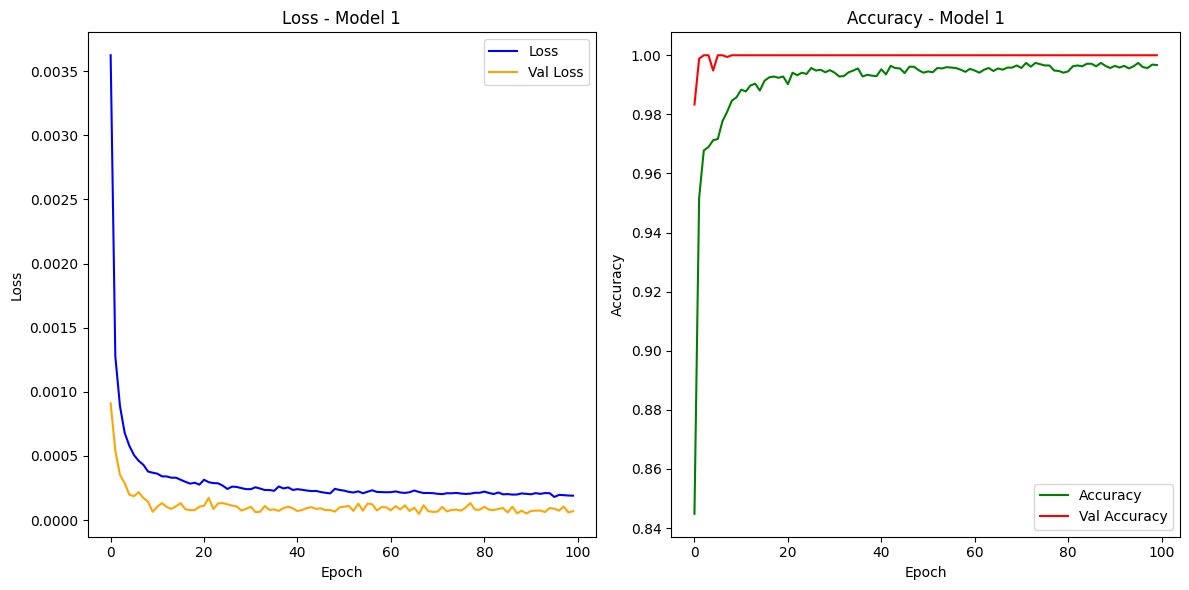

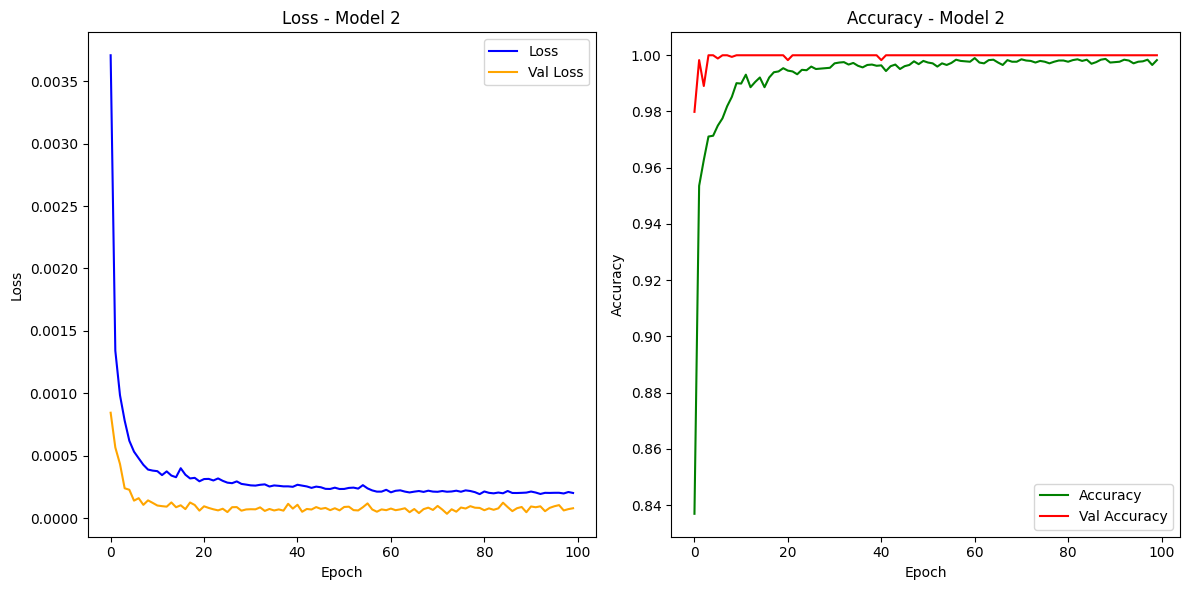

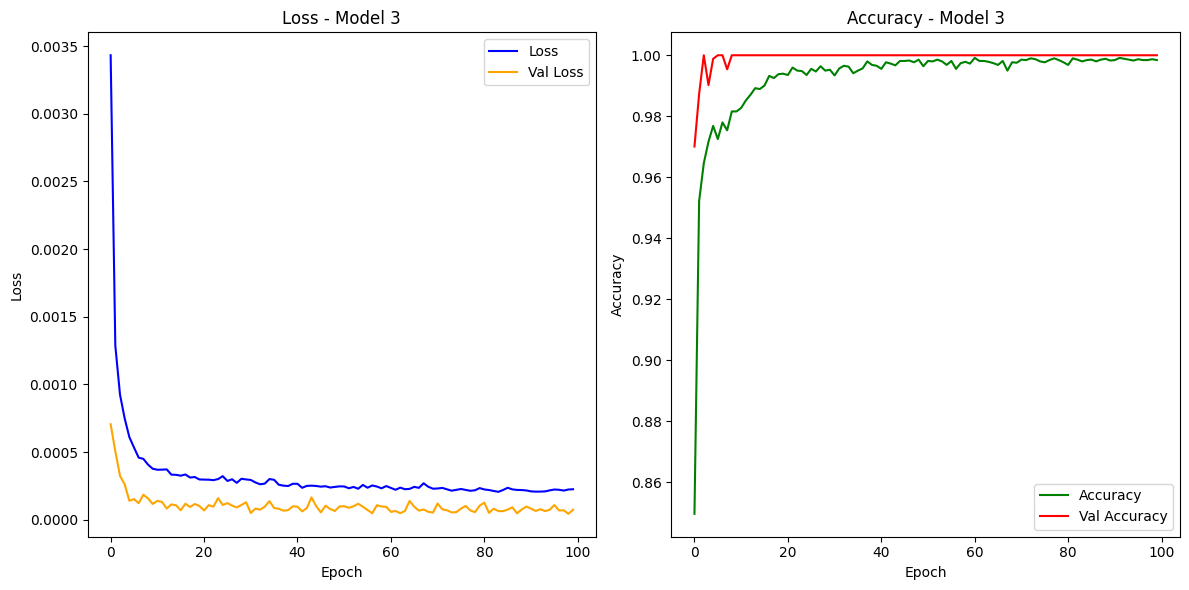

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step
Model 1 - RMSE: 0.0083, MAE: 0.0060, R²: 0.9879
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step
Model 2 - RMSE: 0.0088, MAE: 0.0063, R²: 0.9878
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Model 3 - RMSE: 0.0086, MAE: 0.0064, R²: 0.9886


In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 1. Đảm bảo mô hình được biên dịch với 'accuracy'
model_1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'accuracy'])
model_2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'accuracy'])
model_3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'accuracy'])

# 2. Huấn luyện các mô hình với verbose=1
epochs = 100
batch_size = 32

# Huấn luyện mô hình 1 và hiển thị quá trình huấn luyện
history_1 = model_1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

# Huấn luyện mô hình 2 và hiển thị quá trình huấn luyện
history_2 = model_2.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

# Huấn luyện mô hình 3 và hiển thị quá trình huấn luyện
history_3 = model_3.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

# 3. Hiển thị kết quả huấn luyện
def plot_history(history, model_name):
    plt.figure(figsize=(12, 6))
    
    # Vẽ loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
    plt.title(f'Loss - {model_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Vẽ accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Accuracy', color='green')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='red')
    plt.title(f'Accuracy - {model_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Vẽ đồ thị cho từng mô hình
plot_history(history_1, 'Model 1')
plot_history(history_2, 'Model 2')
plot_history(history_3, 'Model 3')

# 4. Đánh giá mô hình
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_flat = y_pred  # Dữ liệu đầu ra có thể cần chuyển đổi tùy thuộc vào mô hình

    # Tính các chỉ số đánh giá
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_flat))
    mae = mean_absolute_error(y_test, y_pred_flat)
    r2 = r2_score(y_test, y_pred_flat)

    return rmse, mae, r2

# Đánh giá mô hình 1
rmse_1, mae_1, r2_1 = evaluate_model(model_1, X_test, y_test)
print(f'Model 1 - RMSE: {rmse_1:.4f}, MAE: {mae_1:.4f}, R²: {r2_1:.4f}')

# Đánh giá mô hình 2
rmse_2, mae_2, r2_2 = evaluate_model(model_2, X_test, y_test)
print(f'Model 2 - RMSE: {rmse_2:.4f}, MAE: {mae_2:.4f}, R²: {r2_2:.4f}')

# Đánh giá mô hình 3
rmse_3, mae_3, r2_3 = evaluate_model(model_3, X_test, y_test)
print(f'Model 3 - RMSE: {rmse_3:.4f}, MAE: {mae_3:.4f}, R²: {r2_3:.4f}')


In [100]:
# Đánh giá mô hình 1
rmse_1, mae_1, r2_1 = evaluate_model(model_1, X_test, y_test)
print(f'Model 1 - RMSE: {rmse_1:.4f}, MAE: {mae_1:.4f}, R²: {r2_1:.4f}')

# Đánh giá mô hình 2
rmse_2, mae_2, r2_2 = evaluate_model(model_2, X_test, y_test)
print(f'Model 2 - RMSE: {rmse_2:.4f}, MAE: {mae_2:.4f}, R²: {r2_2:.4f}')

# Đánh giá mô hình 3
rmse_3, mae_3, r2_3 = evaluate_model(model_3, X_test, y_test)
print(f'Model 3 - RMSE: {rmse_3:.4f}, MAE: {mae_3:.4f}, R²: {r2_3:.4f}')


68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step
Model 1 - RMSE: 0.0083, MAE: 0.0060, R²: 0.9879
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step
Model 2 - RMSE: 0.0088, MAE: 0.0063, R²: 0.9878
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step
Model 3 - RMSE: 0.0086, MAE: 0.0064, R²: 0.9886


🔍 So sánh hiệu suất giữa các mô hình ANN và học máy truyền thống:
               Model      RMSE       MAE        R²
5      Random Forest  0.007708  0.005185  0.999311
0      ANN - Model 1  0.008258  0.006029  0.987913
2      ANN - Model 3  0.008584  0.006362  0.988640
1      ANN - Model 2  0.008836  0.006328  0.987759
4      Decision Tree  0.011101  0.007296  0.998572
3  Linear Regression  0.067284  0.050529  0.941284
6                SVR  0.074649  0.061596  0.935700


C:\Users\Bon\AppData\Local\Temp\ipykernel_2124\2565075799.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison_df, x="Model", y="RMSE", palette="Blues_d")


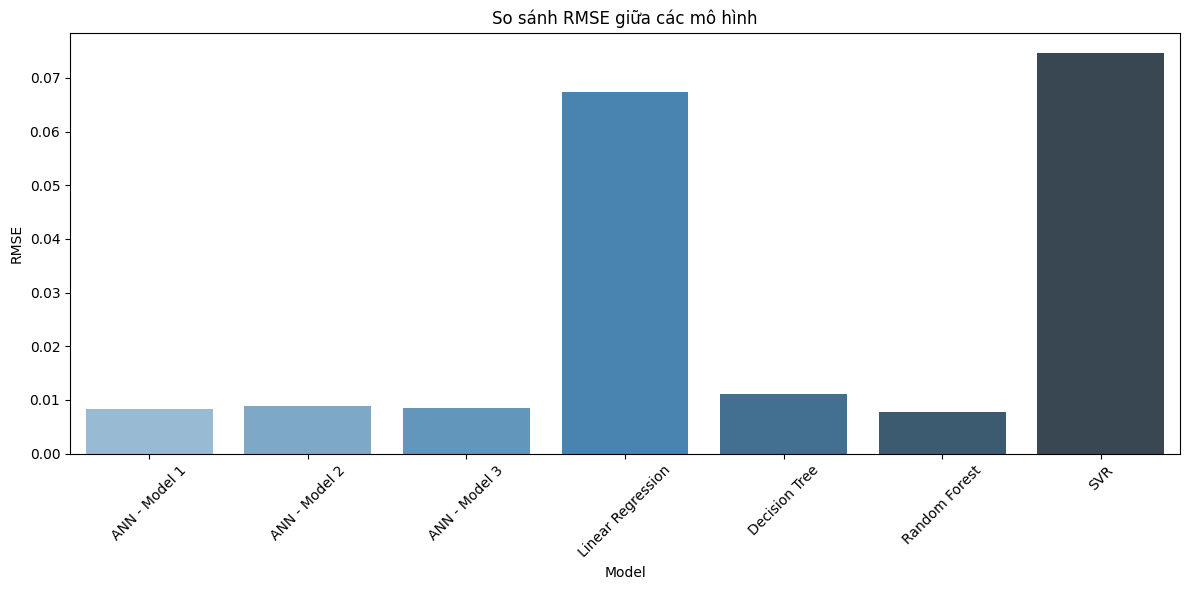

In [101]:
comparison_results = {
    "Model": [
        "ANN - Model 1",
        "ANN - Model 2",
        "ANN - Model 3",
        "Linear Regression",
        "Decision Tree",
        "Random Forest",
        "SVR"
    ],
    "RMSE": [
        rmse_1, rmse_2, rmse_3,
        float(results_df.loc[results_df["Model"] == "Linear Regression", "RMSE"].values[0]),
        float(results_df.loc[results_df["Model"] == "Decision Tree", "RMSE"].values[0]),
        float(results_df.loc[results_df["Model"] == "Random Forest", "RMSE"].values[0]),
        float(results_df.loc[results_df["Model"] == "SVR", "RMSE"].values[0])
    ],
    "MAE": [
        mae_1, mae_2, mae_3,
        float(results_df.loc[results_df["Model"] == "Linear Regression", "MAE"].values[0]),
        float(results_df.loc[results_df["Model"] == "Decision Tree", "MAE"].values[0]),
        float(results_df.loc[results_df["Model"] == "Random Forest", "MAE"].values[0]),
        float(results_df.loc[results_df["Model"] == "SVR", "MAE"].values[0])
    ],
    "R²": [
        r2_1, r2_2, r2_3,
        float(results_df.loc[results_df["Model"] == "Linear Regression", "R²"].values[0]),
        float(results_df.loc[results_df["Model"] == "Decision Tree", "R²"].values[0]),
        float(results_df.loc[results_df["Model"] == "Random Forest", "R²"].values[0]),
        float(results_df.loc[results_df["Model"] == "SVR", "R²"].values[0])
    ],
}

comparison_df = pd.DataFrame(comparison_results)

print("🔍 So sánh hiệu suất giữa các mô hình ANN và học máy truyền thống:")
print(comparison_df.sort_values(by="RMSE"))

# Trực quan hóa RMSE
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_df, x="Model", y="RMSE", palette="Blues_d")
plt.xticks(rotation=45)
plt.title("So sánh RMSE giữa các mô hình")
plt.ylabel("RMSE")
plt.tight_layout()
plt.show()
